### Generate and save charged offmols from FreeSolv SMILES

In [2]:
from openforcefield.topology import Molecule
from openforcefield.typing.engines.smirnoff import ForceField
forcefield = ForceField('openff-1.2.0.offxml')

In [3]:
path_to_database = '../../data/freesolv/database.txt'
with open(path_to_database, 'r') as f:
    db = f.readlines()

In [9]:
columns = [c.strip() for c in db[2].split(';')]
columns

['# compound id (and file prefix)',
 'SMILES',
 'iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
 'experimental value (kcal/mol)',
 'experimental uncertainty (kcal/mol)',
 'Mobley group calculated value (GAFF) (kcal/mol)',
 'calculated uncertainty (kcal/mol)',
 'experimental reference (original or paper this value was taken from)',
 'calculated reference',
 'text notes.']

In [13]:
compound_ids = [line.split(';')[0] for line in db[3:]]
compound_ids[:4]
    

['mobley_1017962', 'mobley_1019269', 'mobley_1034539', 'mobley_1036761']

In [34]:
import pandas as pd
df = pd.DataFrame(index=compound_ids, columns=columns[1:])

In [35]:
[s.strip() for s in db[3].split(';')]

['mobley_1017962',
 'CCCCCC(=O)OC',
 'methyl hexanoate',
 '-2.49',
 '0.60',
 '-3.30',
 '0.03',
 '10.1021/ct050097l',
 '10.1021/acs.jced.7b00104',
 'Experimental uncertainty not presently available, so assigned a default value.']

In [36]:
columns[0]

'# compound id (and file prefix)'

In [55]:
for line in db[3:]:
    tokens = [s.strip() for s in line.split(';')]
    key, smiles, iupac = tokens[:3]
    expt_mean, expt_unc, calc_mean, calc_unc = map(float, tokens[3:7])
    expt_ref, calc_ref = tokens[7:9]
    notes = tokens[9]
    
    for i in range(1, len(tokens)):
        df[columns[i]][key] = tokens[i]
    
    # for the numerical values, store as floats rather than as strings
    for i in range(3, 7):
        df[columns[i]][key] = float(tokens[i])

In [56]:
df['experimental value (kcal/mol)']['mobley_1017962']

-2.49

In [57]:
df

,SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.,offmol
mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.3,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C1(C(C(C(...
mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
...,...,...,...,...,...,...,...,...,...,...
mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet...",Molecule with name '' and SMILES '[H]/C(=C(/[H...
mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...


In [58]:
smiles = df['SMILES']
smiles

mobley_1017962                              CCCCCC(=O)OC
mobley_1019269                                     CCCCO
mobley_1034539    c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl
mobley_1036761                               C1CCC(CC1)N
mobley_1046331                            c1ccc(cc1)OC=O
                                   ...                  
mobley_9913368                               C(=C/Cl)\Cl
mobley_9942801                             CCc1ccc(cc1)C
mobley_994483                                       CCBr
mobley_9974966                               CC(C)SC(C)C
mobley_9979854                         C[C@H](C(F)(F)F)O
Name: SMILES, Length: 642, dtype: object

In [59]:
len(smiles)

642

In [60]:
smiles[0]

'CCCCCC(=O)OC'

In [61]:
df.index

Index(['mobley_1017962', 'mobley_1019269', 'mobley_1034539', 'mobley_1036761',
       'mobley_1046331', 'mobley_1075836', 'mobley_1079207', 'mobley_1107178',
       'mobley_1139153', 'mobley_1144156',
       ...
       'mobley_9794857', 'mobley_9821936', 'mobley_9838013', 'mobley_9883303',
       'mobley_9897248', 'mobley_9913368', 'mobley_9942801', 'mobley_994483',
       'mobley_9974966', 'mobley_9979854'],
      dtype='object', length=642)

In [62]:
df.columns

Index(['SMILES',
       'iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
       'experimental value (kcal/mol)', 'experimental uncertainty (kcal/mol)',
       'Mobley group calculated value (GAFF) (kcal/mol)',
       'calculated uncertainty (kcal/mol)',
       'experimental reference (original or paper this value was taken from)',
       'calculated reference', 'text notes.', 'offmol'],
      dtype='object')

In [73]:
offmols = dict()
from tqdm import tqdm

for key in tqdm(df.index):
    offmols[key] = Molecule.from_smiles(df['SMILES'][key], allow_undefined_stereo=True)
    offmols[key].compute_partial_charges_am1bcc()

 31%|███       | 200/642 [01:08<03:07,  2.35it/s]Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 1, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 0, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 2, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 7, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 1, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 0, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 2, aromatic: False, chiral: False
bond order: 1, chiral: F

In [74]:
df['offmol'] = None

#### Add columns for offmols, serialized openmm systems?

In [75]:
df

,SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.,offmol
mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.3,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
...,...,...,...,...,...,...,...,...,...,...
mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet...",None
mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None
mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,None


In [76]:
for key in df.index:
    df['offmol'][key] = offmols[key]

In [77]:
df

,SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.,offmol
mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.3,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C1(C(C(C(...
mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
...,...,...,...,...,...,...,...,...,...,...
mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet...",Molecule with name '' and SMILES '[H]/C(=C(/[H...
mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]c1c(c(c(c...
mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...
mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...,Molecule with name '' and SMILES '[H]C([H])([H...


### Check that charge-sums are all ~zero

In [78]:
offmols = df['offmol']

In [79]:
offmols[0].partial_charges

Quantity(value=array([-0.09266   , -0.07967   , -0.07829   , -0.07824   , -0.12671   ,
        0.63147002, -0.53658998, -0.44984001,  0.12808   ,  0.03392   ,
        0.03392   ,  0.03392   ,  0.04138   ,  0.04138   ,  0.03957   ,
        0.03957   ,  0.05656   ,  0.05656   ,  0.07839   ,  0.07839   ,
        0.04963   ,  0.04963   ,  0.04963   ]), unit=elementary charge)

In [80]:
o = offmols[0]

In [81]:
o.partial_charges

Quantity(value=array([-0.09266   , -0.07967   , -0.07829   , -0.07824   , -0.12671   ,
        0.63147002, -0.53658998, -0.44984001,  0.12808   ,  0.03392   ,
        0.03392   ,  0.03392   ,  0.04138   ,  0.04138   ,  0.03957   ,
        0.03957   ,  0.05656   ,  0.05656   ,  0.07839   ,  0.07839   ,
        0.04963   ,  0.04963   ,  0.04963   ]), unit=elementary charge)

In [84]:
o.partial_charges.sum()

Quantity(value=4.0978193283081055e-08, unit=elementary charge)

In [90]:
from simtk import unit

In [91]:
charge_sums = [o.partial_charges.sum() / unit.elementary_charge for o in offmols]

In [92]:
import numpy as np
np.abs(charge_sums).max()

1.1175870895385742e-07

(array([  1.,   4.,  13.,  70., 206., 225.,  87.,  26.,   7.,   3.]),
 array([-1.11758709e-07, -8.94069672e-08, -6.70552254e-08, -4.47034836e-08,
        -2.23517418e-08,  0.00000000e+00,  2.23517418e-08,  4.47034836e-08,
         6.70552254e-08,  8.94069672e-08,  1.11758709e-07]),
 <BarContainer object of 10 artists>)

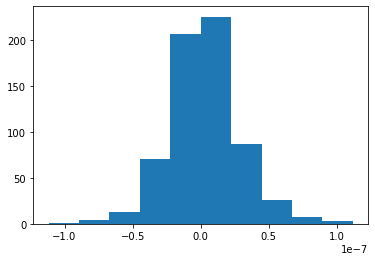

In [94]:
import matplotlib.pyplot as plt
plt.hist(charge_sums)

In [96]:
df.to_hdf('freesolv.h5', 'df')

/Users/joshuafass/anaconda3/envs/espaloma/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['SMILES',
       'iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
       'experimental value (kcal/mol)', 'experimental uncertainty (kcal/mol)',
       'Mobley group calculated value (GAFF) (kcal/mol)',
       'calculated uncertainty (kcal/mol)',
       'experimental reference (original or paper this value was taken from)',
       'calculated reference', 'text notes.', 'offmol'],
      dtype='object')]

  encoding=encoding,


#### Parameterize with parsley 1.2, save serialized openmm systems

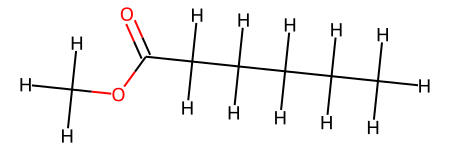

In [97]:
o

In [98]:
o.to_topology()

In [ ]:
from simtk.openmm import S

In [100]:
system = forcefield.create_openmm_system(o.to_topology())

In [102]:
from simtk.openmm import XmlSerializer

In [104]:
serialized = XmlSerializer.serializeSystem(system)

In [105]:
deserialized = XmlSerializer.deserializeSystem(serialized)

In [111]:
# hmm, why not equal after round-trip, just the swig addresses?
# or is there something meaningfully different?
# TODO: maybe double-check this...
deserialized == system

False

In [112]:
system, deserialized

(<simtk.openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7fd5a31a6420> >,
 <simtk.openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7fd5a47229f0> >)

In [113]:
df['serialized_openmm_system'] = None

In [116]:
for key in tqdm(df.index):
    system = forcefield.create_openmm_system(df['offmol'][key].to_topology())
    df['serialized_openmm_system'][key] = XmlSerializer.serializeSystem(system)

 31%|███       | 200/642 [02:17<05:35,  1.32it/s]Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 1, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 0, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 2, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 7, aromatic: True, chiral: False

100%|██████████| 642/642 [06:58<00:00,  1.54it/s]


In [119]:
print(df['serialized_openmm_system'][key])

<?xml version="1.0" ?>
<System openmmVersion="7.4.2" type="System" version="1">
	<PeriodicBoxVectors>
		<A x="2" y="0" z="0"/>
		<B x="0" y="2" z="0"/>
		<C x="0" y="0" z="2"/>
	</PeriodicBoxVectors>
	<Particles>
		<Particle mass="12.01078"/>
		<Particle mass="12.01078"/>
		<Particle mass="1.007947"/>
		<Particle mass="12.01078"/>
		<Particle mass="18.99840325"/>
		<Particle mass="18.99840325"/>
		<Particle mass="18.99840325"/>
		<Particle mass="15.99943"/>
		<Particle mass="1.007947"/>
		<Particle mass="1.007947"/>
		<Particle mass="1.007947"/>
		<Particle mass="1.007947"/>
	</Particles>
	<Constraints>
		<Constraint d=".1094223427522" p1="0" p2="8"/>
		<Constraint d=".1094223427522" p1="0" p2="9"/>
		<Constraint d=".1094223427522" p1="0" p2="10"/>
		<Constraint d=".1094223427522" p1="1" p2="2"/>
		<Constraint d=".09738225805594" p1="7" p2="11"/>
	</Constraints>
	<Forces>
		<Force alpha="0" cutoff=".9" dispersionCorrection="1" ewaldTolerance=".0005" forceGroup="0" ljAlpha="0" ljnx="0" 

In [120]:
df.to_hdf('freesolv.h5', 'df')

/Users/joshuafass/anaconda3/envs/espaloma/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['SMILES',
       'iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
       'experimental value (kcal/mol)', 'experimental uncertainty (kcal/mol)',
       'Mobley group calculated value (GAFF) (kcal/mol)',
       'calculated uncertainty (kcal/mol)',
       'experimental reference (original or paper this value was taken from)',
       'calculated reference', 'text notes.', 'offmol',
       'serialized_openmm_system'],
      dtype='object')]

  encoding=encoding,


In [122]:
df.columns

Index(['SMILES',
       'iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem)',
       'experimental value (kcal/mol)', 'experimental uncertainty (kcal/mol)',
       'Mobley group calculated value (GAFF) (kcal/mol)',
       'calculated uncertainty (kcal/mol)',
       'experimental reference (original or paper this value was taken from)',
       'calculated reference', 'text notes.', 'offmol',
       'serialized_openmm_system'],
      dtype='object')

TODO: also add vacuum trajectories as a column

In [129]:
from simtk import openmm as mm
from simtk.openmm import app

temperature = 300 * unit.kelvin
gamma = 10.0 / unit.picosecond
dt = 1.0 * unit.femtosecond

In [146]:
def get_vacuum_sim(key):
    """load topology and serialized vacuum simulation"""
    offmol = df['offmol'][key]
    
    top = offmol.to_topology().to_openmm()
    sys = XmlSerializer.deserializeSystem(df['serialized_openmm_system'][key])
    
    sim = app.Simulation(top, sys, mm.LangevinIntegrator(temperature, gamma, dt))
    
    if offmol.conformers is None:
        offmol.generate_conformers()
        
    
    sim.context.setPositions(offmol.conformers[0])
    sim.minimizeEnergy()
    sim.context.setVelocitiesToTemperature(temperature)
    
    return sim

In [147]:
key

'mobley_9979854'

In [153]:
sim = get_vacuum_sim(key)

In [154]:
distance_unit = unit.nanometer

In [155]:
def generate_trajectory(sim, burn_in=1000, n_samples=100, thinning=1000):
    def get_positions():
        return sim.context.getState(getPositions=True).getPositions(asNumpy=True)

    sim.step(burn_in)
    xyz = []
    for _ in tqdm(range(n_samples)):
        sim.step(thinning)
        xyz.append(get_positions().value_in_unit(distance_unit))
    return np.array(xyz)

In [156]:
xyz = generate_trajectory(sim)

100%|██████████| 100/100 [00:23<00:00,  4.33it/s]


In [157]:
gbsa_forcefield = ForceField('test_forcefields/GBSA_OBC1-1.0.offxml')

In [158]:
gbsa_forcefield.create_openmm_system(o.to_topology())

AssertionError: 

Hmm, can't directly create a GBSA only system, will create a valence + GBSA system and delete valence...